In [1]:
# Step 1: Load the Dataset
import pandas as pd

In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Online retail.xlsx to Online retail.xlsx


In [4]:
df = pd.read_excel('Online retail.xlsx')

In [5]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB
None


In [6]:
# Show first few rows
print(df.head())

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

In [7]:
# Check for missing values
print(df.isnull().sum())

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64


In [8]:
# Step 2: Data Preprocessing
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [11]:
# Convert Data into Transaction Format
# We'll split the product list into separate items and transform it into a basket format.

In [12]:
# Convert transaction string into a list of items
df['Transaction'] = df[df.columns[0]].apply(lambda x: x.split(','))

In [13]:
# Convert transactions into a list of lists
transactions = df['Transaction'].tolist()

In [14]:
# Print the first few transactions
print(transactions[:5])  # To see how transactions look

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt']]


In [15]:
# Convert to One-Hot Encoding
# We now convert this list of transactions into a one-hot encoded DataFrame.

In [16]:
from mlxtend.preprocessing import TransactionEncoder

In [17]:
# Use TransactionEncoder to one-hot encode the transaction data
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

In [18]:
# Convert to DataFrame
basket = pd.DataFrame(te_array, columns=te.columns_)

print(basket.head())  # Display the transformed data

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [19]:
# Step 3: Apply Apriori Algorithm
# Now that the data is formatted correctly, we can apply Association Rule Mining.

In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [21]:
# Apply Apriori algorithm to get frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

In [22]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [23]:
# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

      antecedents      consequents  support  confidence      lift
0       (burgers)           (eggs)   0.0288    0.330275  1.837585
1          (eggs)        (burgers)   0.0288    0.160237  1.837585
2       (burgers)   (french fries)   0.0220    0.252294  1.475976
3  (french fries)        (burgers)   0.0220    0.128705  1.475976
4       (burgers)  (mineral water)   0.0244    0.279817  1.174384


In [24]:
# Adjusting Thresholds in Apriori Algorithm
# We modify the min_support, confidence, and lift values to filter stronger relationships.

In [25]:
# Apply Apriori with a lower or higher min_support as needed
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)  # Adjust support here

In [26]:
# Generate association rules with adjusted confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)  # Adjust confidence
rules = rules[rules['lift'] > 1.2]  # Adjust lift

In [27]:
# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

  antecedents      consequents   support  confidence      lift
0   (avocado)  (mineral water)  0.011467    0.345382  1.449559
1   (burgers)           (eggs)  0.028800    0.330275  1.837585
2      (cake)  (mineral water)  0.027467    0.338816  1.422002
3   (cereals)  (mineral water)  0.010267    0.398964  1.674442
4   (chicken)  (mineral water)  0.022800    0.380000  1.594852


In [29]:
import matplotlib.pyplot as plt

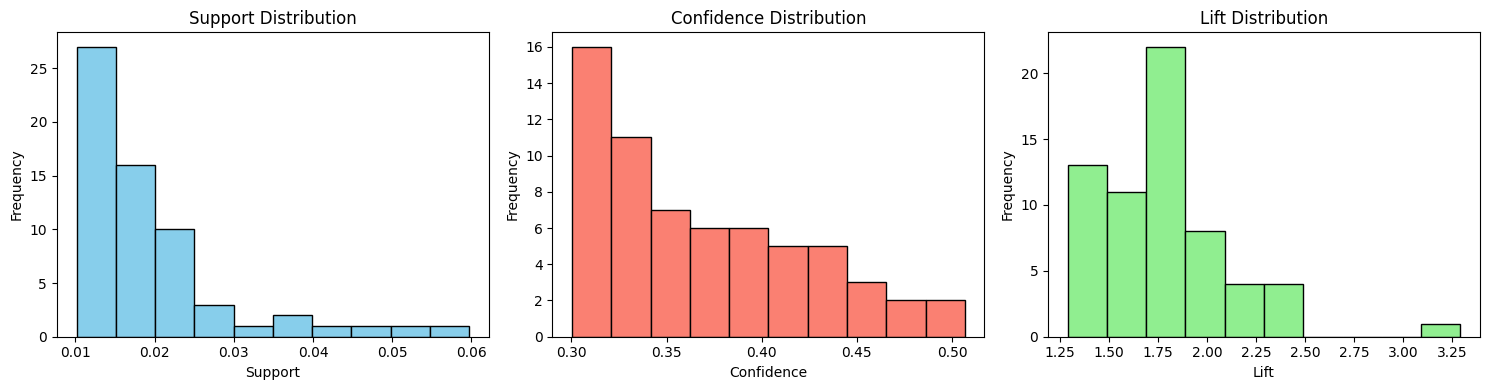

In [30]:
# Visualize the Distribution of Support, Confidence, and Lift
# Plot histograms for Support, Confidence, and Lift
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Support distribution
axes[0].hist(rules['support'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Support Distribution')
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Frequency')

# Confidence distribution
axes[1].hist(rules['confidence'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Confidence Distribution')
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Frequency')

# Lift distribution
axes[2].hist(rules['lift'], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Lift Distribution')
axes[2].set_xlabel('Lift')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [32]:
import networkx as nx


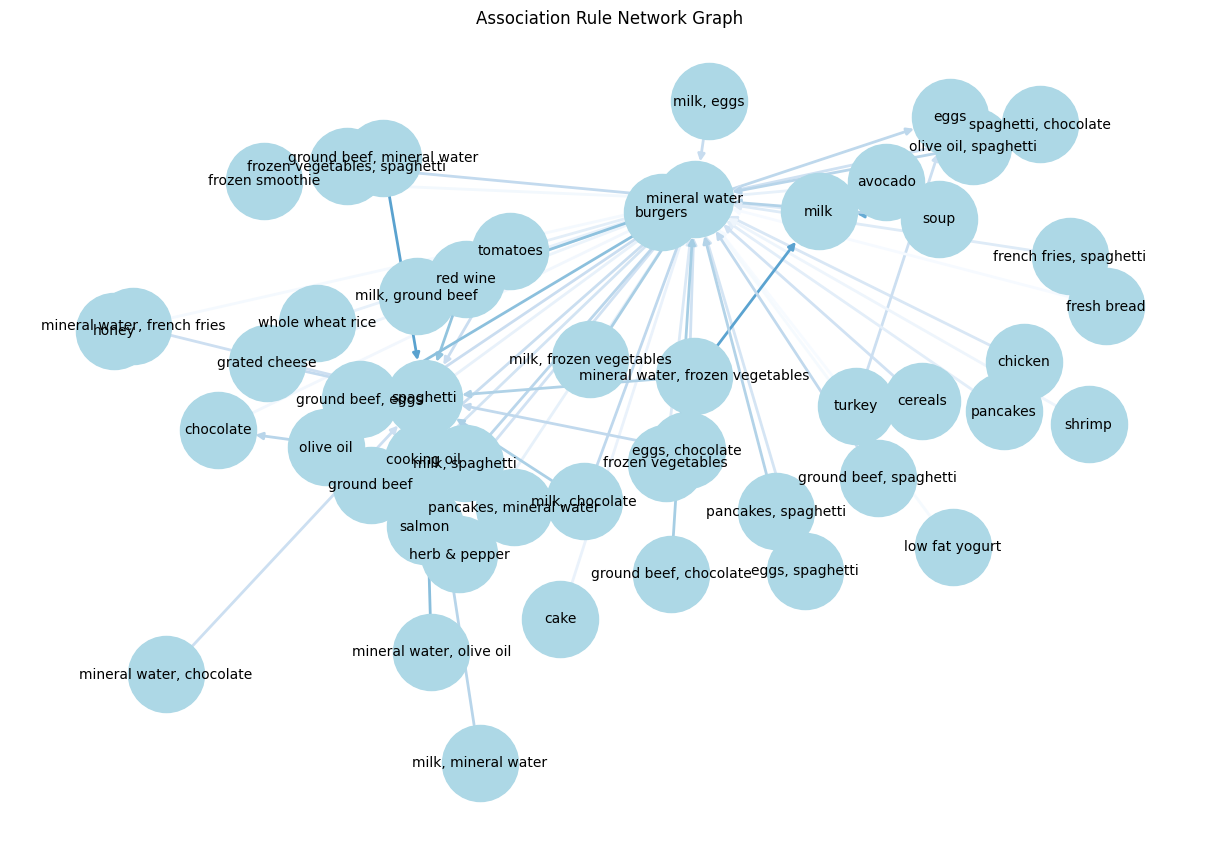

In [33]:
# Network Graph for Association Rules
# Create a Network Graph of association rules
G = nx.DiGraph()

for _, row in rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Layout for better spacing
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # Lift values as edge weights

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, edge_color=weights,
        edge_cmap=plt.cm.Blues, width=2)

plt.title("Association Rule Network Graph")
plt.show()



In [34]:
# Interpretation of Results
# Top Rules with Business Insights
# Print top rules for insights
for i, row in rules.sort_values(by='lift', ascending=False).head(5).iterrows():
    print(f"Rule {i+1}: {', '.join(row['antecedents'])} → {', '.join(row['consequents'])}")
    print(f"  - Support: {row['support']:.2f}")
    print(f"  - Confidence: {row['confidence']:.2f}")
    print(f"  - Lift: {row['lift']:.2f}\n")


Rule 15: herb & pepper → ground beef
  - Support: 0.02
  - Confidence: 0.32
  - Lift: 3.29

Rule 56: ground beef, mineral water → spaghetti
  - Support: 0.02
  - Confidence: 0.42
  - Lift: 2.39

Rule 52: mineral water, frozen vegetables → milk
  - Support: 0.01
  - Confidence: 0.31
  - Lift: 2.39

Rule 23: soup → milk
  - Support: 0.02
  - Confidence: 0.30
  - Lift: 2.32

Rule 17: ground beef → spaghetti
  - Support: 0.04
  - Confidence: 0.40
  - Lift: 2.29



In [ ]:
# Interview Questions:
# 1.	What is lift and why is it important in Association rules?
# Lift measures how much more likely two items are to be bought together compared to them being purchased independently.
# Why It’s Important:

# A higher lift value means a strong dependency between items.
# Helps filter out weak rules and focus on meaningful relationships.

In [ ]:
# 2.	What is support and Confidence. How do you calculate them?
# Support:
# Indicates how frequently an item or item set appears in all transactions.
# Example: If 5 out of 100 transactions contain “bread & butter,” the support is 5%.
# Confidence:
# Measures the likelihood that the consequent (Y) is bought given that the antecedent (X) is bought.
# Example: If “milk” appears in 20% of transactions and "milk & cereal" together appear in 15%, then:

# \text{Confidence} (milk \Rightarrow cereal) = \frac{15}{20} = 0.75 \text{ (75%)}
# Higher confidence means a stronger rule.

In [ ]:
# 3.	What are some limitations or challenges of Association rules mining?
# High Computational Cost – For large datasets, Apriori can be slow as it scans the database multiple times.

# Too Many Rules – Can generate thousands of rules, making it hard to find meaningful ones.

# Low Support for Rare Items – Rare but valuable item associations may be missed.

# Redundant Rules – Some rules might be obvious or repetitive (e.g., "Bread → Butter" and "Butter → Bread").

# Lack of Temporal Context – Doesn’t consider time-based trends (e.g., seasonal purchase patterns).